In [16]:
import tensorflow as tf 
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt


#importing tensorflow 

#importing keras keras is a high level api of the tensorflow platform

#api:-An API, or application programming interface, is a set of 
#rules or protocols that let software applications communicate
#with each other to exchange data, features and functionality.

#importing matplotlib

In [17]:
BATCH_SIZE = 30
IMAGE_SIZE = 234
CHANNELS=3
EPOCHS=20

#we are initialising the constants

#batch size of images is 30 

#image size across all images is 234*234 resizing

#epochs this is a tryle error for bettrer accuracy of our model epochs ranging from 
#10,20,30,40,50....

#channels means the ANY IMAGE have a rgb

In [18]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "skin-disease-datasaet",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE)
#by using keras method we are retriving our dataset for training

#the seed() method used to initialize the random number generator

#shuffeling the images for better accuracy

#we are giving the image size 234*234

#and also giving the batch size it loads the all images and 
#devides in batches as 32 images per batch

Found 1293 files belonging to 8 classes.


In [19]:
class_names = dataset.class_names
class_names

# there is total 8 classes of skin disease dataset 

['BA- cellulitis',
 'BA-impetigo',
 'FU-athlete-foot',
 'FU-nail-fungus',
 'FU-ringworm',
 'PA-cutaneous-larva-migrans',
 'VI-chickenpox',
 'VI-shingles']

In [20]:
len(dataset)

#return the number of elements (length) in an iterator/object
#passed to the function

44

(30, 234, 234, 3)
[7 7 6 2 1 6 4 6 2 7 2 5 7 0 3 4 3 0 1 0 2 4 5 0 0 7 4 2 4 4]


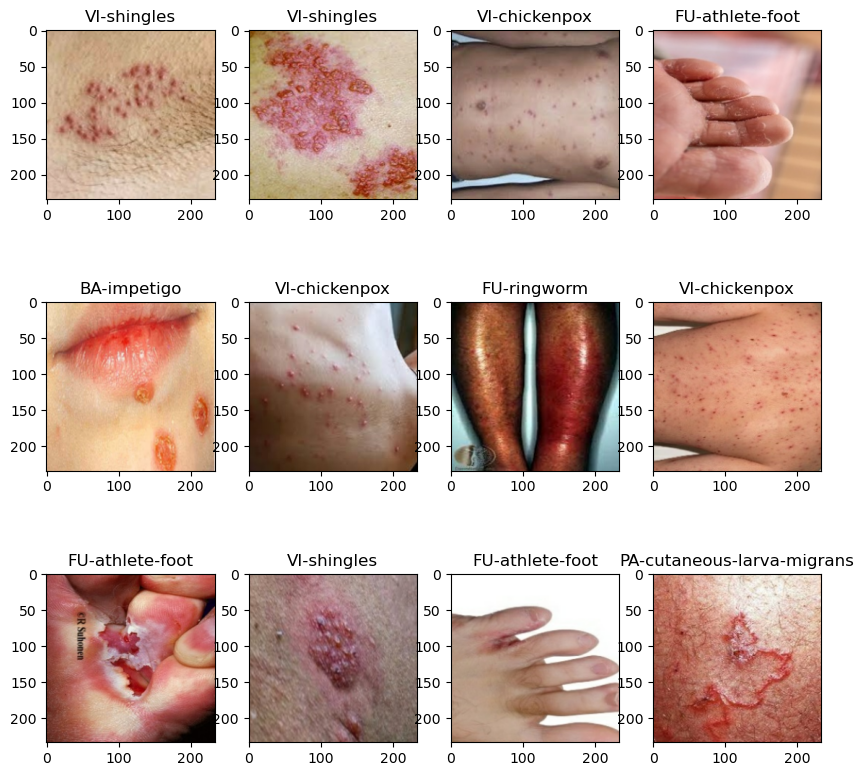

In [34]:

plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):


    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        
        
        # here we are visulize the images of skin disease 
#with axis and with their class names   

(30, 234, 234, 3)
[6 1 2 4 6 0 1 0 4 0 5 4 5 4 4 4 1 4 4 4 7 4 4 4 4 6 0 0 2 0]


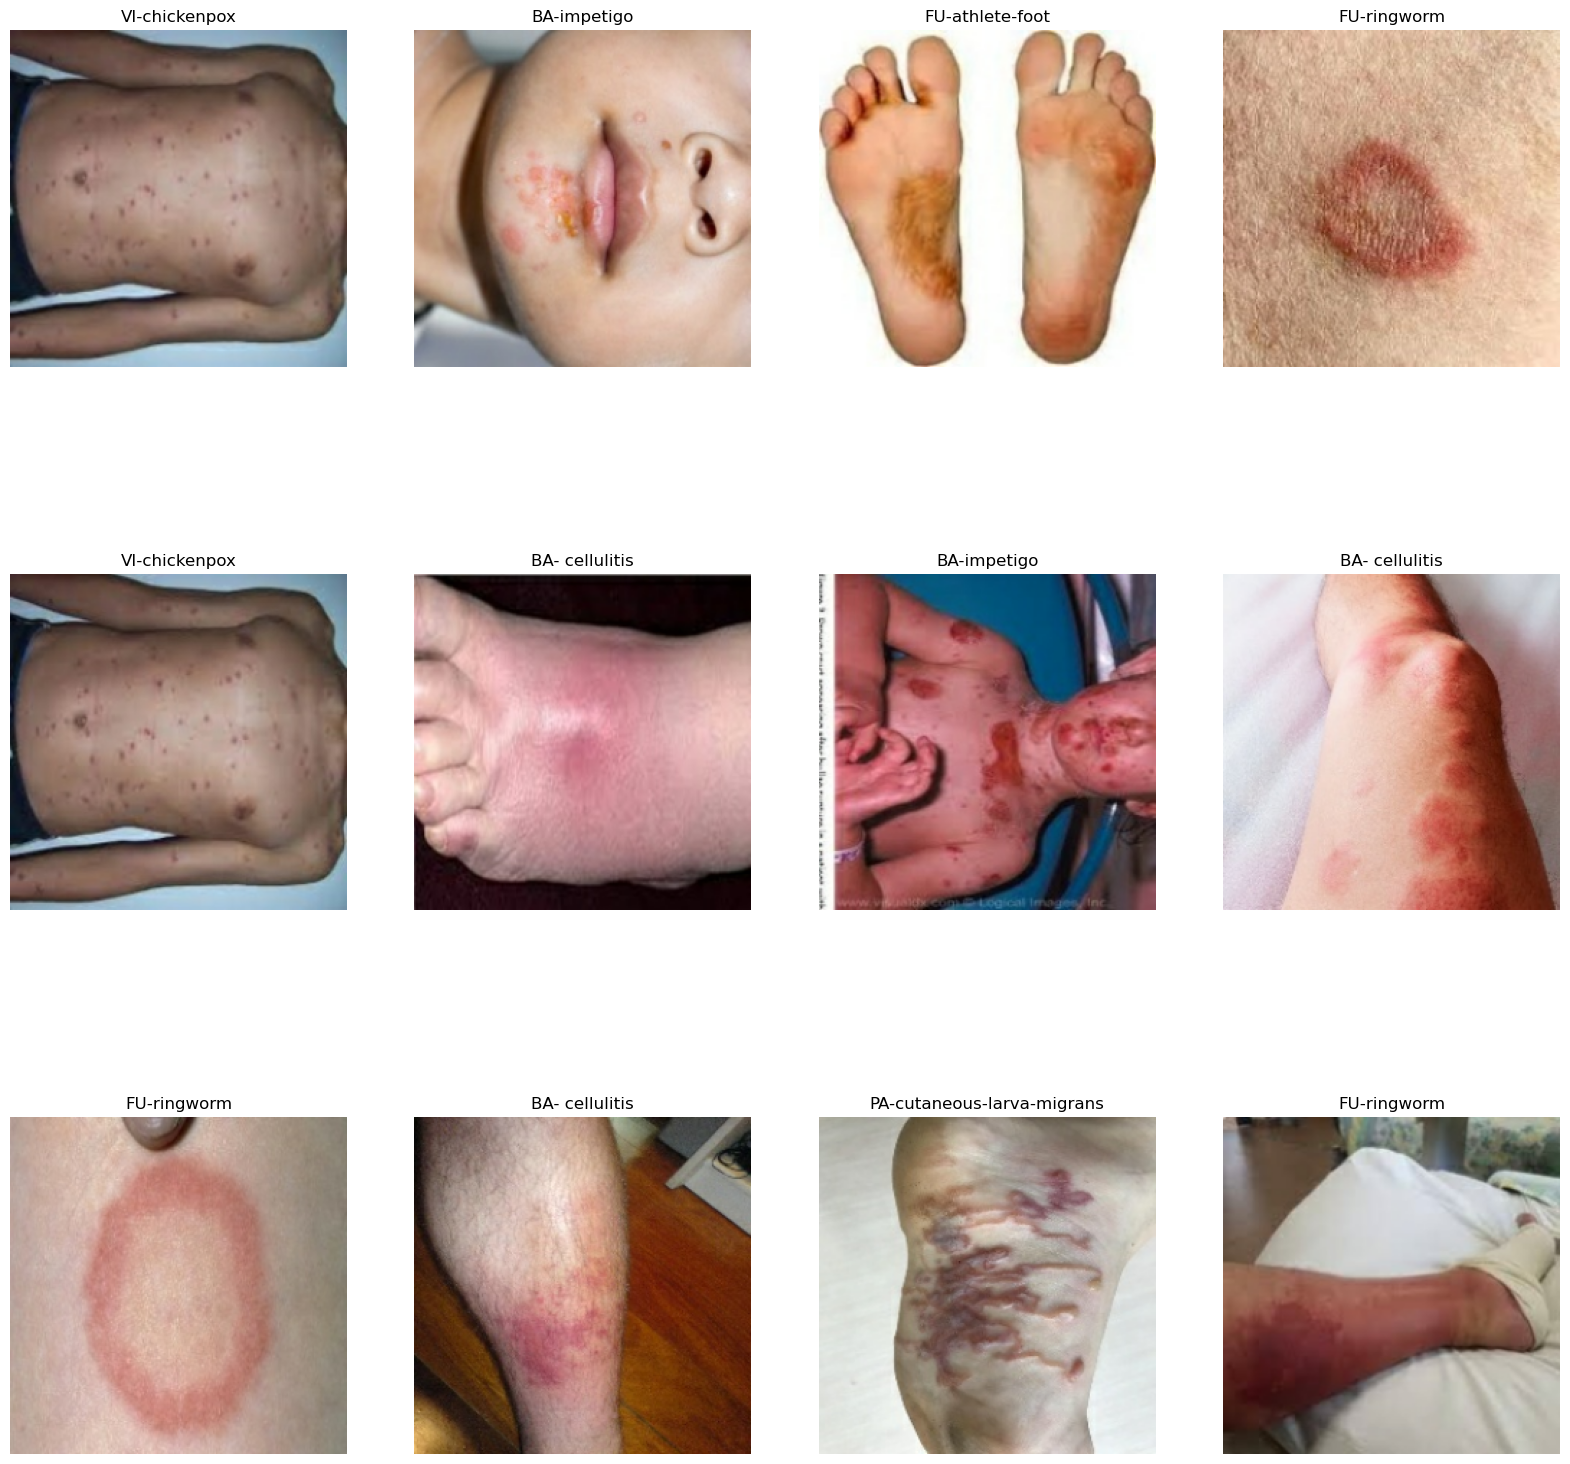

In [37]:

plt.figure(figsize=(20,20))
for image_batch, labels_batch in dataset.take(1):


    print(image_batch.shape)
    print(labels_batch.numpy())
    
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.axis("off")
        plt.title(class_names[labels_batch[i]])
        
        
        # here we are visulize the images of skin disease 
#without axis and with their class names 

In [ ]:
80% ==> training
20% ==> testing
        10% ==> validation
        10% ==> test
        
        #here we are deciding parts of our dataset for trainimng 
        #for testing and validation
        

In [45]:
train_size = 0.8
len(dataset)*train_size


#we are using 80% of data for traing 

35.2

In [49]:
train_ds = dataset.take(35)
len(train_ds)

#we are keeping the train size of 35 for training of dataset


35

In [65]:
test_ds = dataset.skip(35) 
len(test_ds)

##we are keeping the train size of 35 for training of dataset 
#and remaining are skipped and keeping for testing and validation

9

In [64]:
validation_size=0.1
len(dataset)*validation_size

#we are again spliting data in two parts 1 
#is for validation and another is for test

4.4

In [63]:
validation_ds = test_ds.take(4)
len(validation_ds)

#we are keeping this for validation 

4

In [66]:
test_ds = test_ds.skip(4)
len(test_ds)

#we are using this data for testing 

5

In [74]:
def get_dataset_partitions_tf(ds, train_split=0.8, validation_split=0.1,test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + validation_split) == 1
    
    #we are insuring the our data is 100% used or not by using assert
    #method
    
    ds_size = len(ds)
    
    #length of dataset
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    #actually splitting the data
    train_size = int(train_split * ds_size)
    validation_size = int(validation_split * ds_size)
    
    train_ds = ds.take(train_size)    
    validation_ds = ds.skip(train_size).take(validation_size)
    test_ds = ds.skip(train_size).skip(validation_size)
    
    return train_ds, validation_ds, test_ds

In [81]:
train_ds, validation_ds, test_ds = get_dataset_partitions_tf(dataset)

In [82]:
len(train_ds)

#train dataset is 80% and their length is 35

35

In [83]:
len(validation_ds)

#validation dataset is 10% and their length is 4

4

In [84]:
len(test_ds)

#test dataset is 10% and their length is 5

5

In [91]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


#cache keeping the data in memory so it reduces the time

In [93]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

    
    # images are shown like tha in 3 dimentional array rgb form

[[[ 34.07265   33.07265   28.072649]
  [ 32.653847  31.653847  26.653847]
  [ 35.67094   34.61816   29.61816 ]
  ...
  [184.0093   149.0093   127.00929 ]
  [185.5483   150.5483   128.5483  ]
  [184.92206  149.92206  127.92206 ]]

 [[ 38.380344  36.944447  31.944445]
  [ 36.91404   35.47814   30.47814 ]
  [ 39.602345  37.59829   32.59829 ]
  ...
  [180.26047  145.47841  122.82456 ]
  [182.3462   147.39369  125.251205]
  [182.78206  147.78206  125.78205 ]]

 [[ 44.944447  41.944447  36.944447]
  [ 43.307693  40.307693  35.307693]
  [ 44.81624   41.81624   36.81624 ]
  ...
  [178.8109   144.547    119.67895 ]
  [181.2009   146.41882  123.765045]
  [181.63675  146.63675  124.63675 ]]

 ...

 [[ 24.627462  20.627462  21.627462]
  [ 23.145302  19.145302  20.145302]
  [ 22.36325   18.36325   19.36325 ]
  ...
  [175.67471  142.67471  135.67471 ]
  [176.17548  143.17548  136.17548 ]
  [179.15187  146.15187  139.15187 ]]

 [[ 22.363203  18.363203  19.363203]
  [ 21.388355  17.388355  18.388355]


In [95]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy().shape)
    
    
    # we showing the shape of image batch

(234, 234, 3)


In [98]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/234)
    
    
    # normalising the 3 dimentional array 
    # nromalising the 3 d array by using image size divide the 3 d
    #array for 3d array converting 0 1form

[[[0.26068377 0.34188035 0.51282054]
  [0.340675   0.42187157 0.59281176]
  [0.28889984 0.37009642 0.5410366 ]
  ...
  [0.04883491 0.11293747 0.2539631 ]
  [0.06492439 0.12902695 0.27005258]
  [0.07692308 0.14102565 0.2820513 ]]

 [[0.32467675 0.40587333 0.5768135 ]
  [0.28862938 0.36982596 0.5407661 ]
  [0.3217851  0.4029817  0.57392186]
  ...
  [0.06440584 0.1285084  0.26953405]
  [0.07641031 0.14051287 0.28153852]
  [0.08092264 0.14502521 0.28605086]]

 [[0.34051064 0.4217072  0.5926474 ]
  [0.30365995 0.38485652 0.5557967 ]
  [0.3260765  0.40727308 0.5782133 ]
  ...
  [0.07651533 0.14061789 0.28164354]
  [0.08409687 0.14819942 0.28922507]
  [0.07737965 0.14148222 0.28250784]]

 ...

 [[0.7361201  0.857148   0.95025194]
  [0.70039773 0.8214256  0.9145295 ]
  [0.6911327  0.81093717 0.911675  ]
  ...
  [0.86752135 0.9539046  1.0009131 ]
  [0.8639784  0.9579955  1.0126379 ]
  [0.867978   0.96199507 1.0166374 ]]

 [[0.70584047 0.8383191  0.9237892 ]
  [0.71071166 0.8431903  0.9286604 ]


In [110]:
resize_and_rescale = tf.keras.Sequential ([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./234),
]
)


# keras layer :- keras layer we use for normalise and scaling

In [112]:

data_augmentation = tf.keras.Sequential ([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
]
)
#data augmentation contrast, zoom, vertical , horrizontal any angle u want 